In [50]:
import numpy as np
import matplotlib.pyplot as plt
import gdal
import cv2

gdal.AllRegister()
plt.rcParams['figure.figsize'] = [10, 5]

In [51]:
# Load data from tif file
ds = gdal.Open('./data/vhExportSmallMax.tif')
vh_band = ds.GetRasterBand(1)
vh = vh_band.ReadAsArray()
vh1_band = ds.GetRasterBand(2)
vh1 = vh1_band.ReadAsArray()
vv_band = ds.GetRasterBand(3)
vv = vv_band.ReadAsArray()

# Strip NaNs (I think these appear where data is redacted)
vh[np.isnan(vh)]=np.median(vh[np.isfinite(vh)])-np.std(vh[np.isfinite(vh)])
vh1[np.isnan(vh1)]=np.median(vh1[np.isfinite(vh1)])-np.std(vh1[np.isfinite(vh1)])
vv[np.isnan(vv)]=np.median(vv[np.isfinite(vv)])-np.std(vv[np.isfinite(vv)])

# Apply the upper and lower cutoffs that Harel Dan applied
vh[vh < -25] = -25
vh[vh > 0] = 0
vh1[vh1 < -20] = -20
vh1[vh1 > 10] = 10
vv[vv < -25] = -25
vv[vv > 0] = 0

# Scale to [0, 255]
vh = vh - np.min(vh)
vh = vh / np.max(vh) * 255
vh1 = vh1 - np.min(vh1)
vh1 = vh1 / np.max(vh1) * 255
vv = vv - np.min(vv)
vv = vv / np.max(vv) * 255

# Plot
img = np.zeros([vh.shape[0],vh.shape[1],3])
img[:,:,0] = vh
img[:,:,1] = vh1
img[:,:,2] = vv
r,g,b = cv2.split(img)
rgb = cv2.merge([r, g, b])
rgb = rgb.astype(np.uint8)
plt.imshow(rgb)
plt.savefig('img.png', dpi=600)

In [52]:
red_m = cv2.inRange(rgb, np.array([110, 0, 0]), np.array([255, 200, 200]))
plt.imshow(red_m)
cbar = plt.colorbar()

In [53]:
green_m = cv2.inRange(rgb, np.array([0, 120, 0]), np.array([200, 255, 200]))
plt.imshow(green_m)
cbar = plt.colorbar()

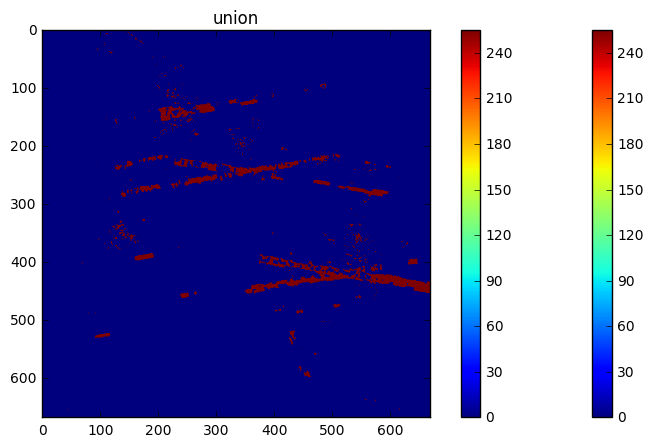

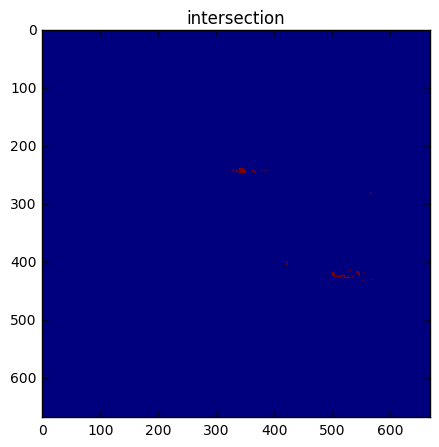

In [54]:
intersection = np.logical_and(green_m, red_m)
union = np.logical_or(green_m, red_m)

plt.imshow(union)
plt.title('union')
plt.show()

plt.imshow(intersection)
plt.title('intersection')
plt.show()

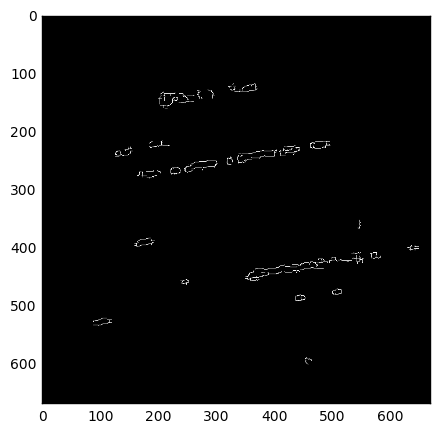

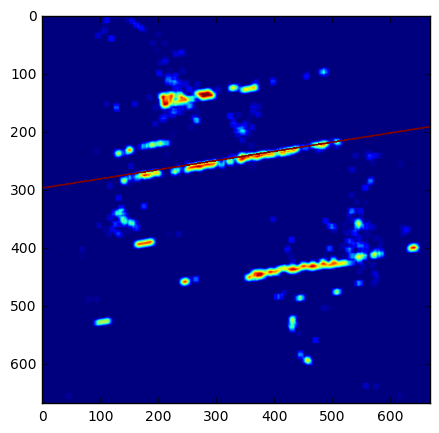

In [49]:
img = red_m.copy()
img = cv2.blur(img, (10, 10))
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sigma = 0.33
v = np.median(img)
lower = int(max(0, (1.0-sigma)*v))
upper = int(min(255, (1.0+sigma)*v))




edges = cv2.Canny(img, 100, 250, apertureSize = 3)
plt.imshow(edges, cmap = 'gray')
plt.show()

lines = cv2.HoughLines(edges, 10, np.pi / 180, 20,15)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(255,255,255),2)

# minLineLength = 1
# maxLineGap = 10
# lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
# # lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 1)
# for x1,y1,x2,y2 in lines[0]:
#     cv2.line(img,(x1,y1),(x2,y2),(255,255,255),2)
    
plt.imshow(img)
plt.show()

In [260]:
lines

array([[[187, 220, 187, 220]],

       [[349, 130, 349, 130]],

       [[120, 368, 120, 366]],

       ...,

       [[547, 401, 547, 401]],

       [[212, 147, 212, 147]],

       [[376, 246, 376, 246]]], dtype=int32)